In [1]:
import pandas as pd

df=pd.read_csv("mnist.csv")

In [2]:
df.shape

(60000, 785)

In [3]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


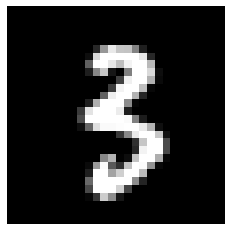

In [4]:
from matplotlib import pyplot as plt
img=df.iloc[45000,1:]

plt.imshow(img.values.reshape(28,28))
plt.gray()
plt.axis("off")
plt.show()

In [5]:
x=df.iloc[:,1:]
y=df.label

# scale inputs
x=x/255
#one hot encoding for outcome variable
y_encoded=pd.get_dummies(y)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y_encoded,random_state=0)

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import livelossplot
from livelossplot import PlotLossesKerasTF

In [7]:
from tensorflow.keras.metrics import Precision, Recall

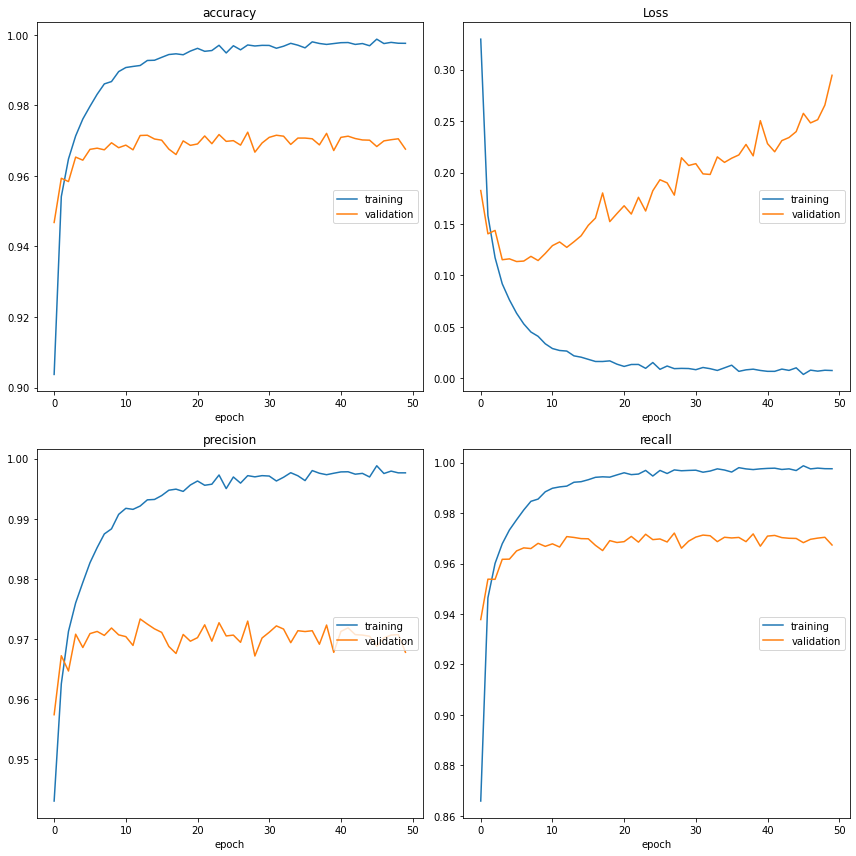

accuracy
	training         	 (min:    0.904, max:    0.999, cur:    0.998)
	validation       	 (min:    0.947, max:    0.972, cur:    0.968)
Loss
	training         	 (min:    0.004, max:    0.330, cur:    0.007)
	validation       	 (min:    0.113, max:    0.295, cur:    0.295)
precision
	training         	 (min:    0.943, max:    0.999, cur:    0.998)
	validation       	 (min:    0.957, max:    0.973, cur:    0.968)
recall
	training         	 (min:    0.866, max:    0.999, cur:    0.998)
	validation       	 (min:    0.938, max:    0.972, cur:    0.967)
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0075 - accuracy: 0.9976 - precision: 0.9976 - recall: 0.9976 - val_loss: 0.2945 - val_accuracy: 0.9676 - val_precision: 0.9678 - val_recall: 0.9673


In [8]:
model=Sequential()
model.add(Dense(50,activation="relu"))#h1
model.add(Dense(50,activation="relu"))#h2
model.add(Dense(10,activation="softmax"))#output
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy",Precision(),Recall()])

model.fit(x_train,y_train,epochs=50,callbacks=[PlotLossesKerasTF()],validation_data=(x_test,y_test))

In [9]:
#predict ouctomes on test data
test_pred=model.predict(x_test)

In [10]:
test_pred

array([[4.6556303e-32, 5.6566603e-23, 1.6647680e-22, ..., 1.5372577e-23,
        1.2796496e-14, 4.5809014e-16],
       [0.0000000e+00, 2.8939115e-33, 2.9597087e-37, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.5084624e-12, 8.0948987e-23, 3.1798350e-05, ..., 4.7575891e-21,
        3.7906252e-19, 2.5582469e-14],
       ...,
       [8.0053037e-31, 9.5548324e-20, 9.9326822e-21, ..., 1.4038703e-16,
        1.8839683e-16, 1.0000000e+00],
       [9.0870941e-01, 7.8876434e-20, 2.2936453e-16, ..., 9.1290608e-02,
        1.3259796e-20, 7.1842803e-11],
       [1.3554577e-28, 1.7018813e-23, 1.0000000e+00, ..., 1.7771038e-16,
        1.6228451e-29, 0.0000000e+00]], dtype=float32)

In [11]:
y_test_pred=test_pred.argmax(axis=1)

In [12]:
pd.crosstab(y_test.idxmax(axis=1),y_test_pred)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,1502,0,0,0,1,0,5,1,1,0
1,1,1709,5,2,1,1,2,7,0,0
2,7,2,1419,13,3,1,2,8,2,1
3,2,0,20,1496,0,11,0,8,7,4
4,1,3,10,0,1382,1,10,8,1,18
5,14,0,3,23,4,1266,15,5,5,7
6,8,3,5,0,5,3,1440,0,4,0
7,4,3,10,4,3,3,1,1503,0,4
8,14,12,18,10,2,15,18,3,1377,15


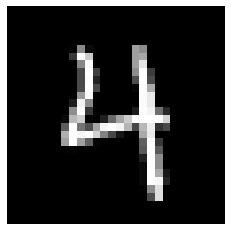

Actual Label:  4
Predicted Label:  4


In [13]:
ind=700
img=x_test.values[ind,:]

plt.imshow(img.reshape(28,28))
plt.gray()
plt.axis("off")
plt.show()
print("Actual Label: ",y_test.values.argmax(axis=1)[ind])
print("Predicted Label: ",y_test_pred[ind])

In [14]:
y_test.shape

(15000, 10)

In [15]:
# L2 Regularizer
from tensorflow.keras.regularizers import L2

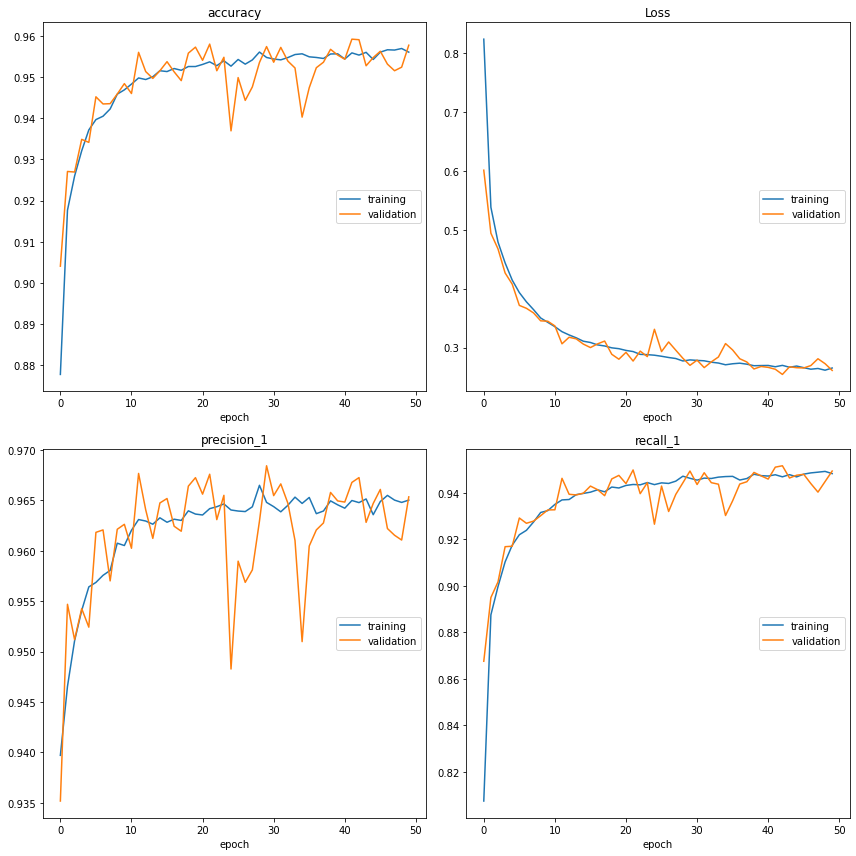

accuracy
	training         	 (min:    0.878, max:    0.957, cur:    0.956)
	validation       	 (min:    0.904, max:    0.959, cur:    0.958)
Loss
	training         	 (min:    0.262, max:    0.824, cur:    0.265)
	validation       	 (min:    0.254, max:    0.601, cur:    0.261)
precision_1
	training         	 (min:    0.940, max:    0.967, cur:    0.965)
	validation       	 (min:    0.935, max:    0.968, cur:    0.965)
recall_1
	training         	 (min:    0.807, max:    0.949, cur:    0.948)
	validation       	 (min:    0.868, max:    0.952, cur:    0.949)
1407/1407 [==============================] - 6s 5ms/step - loss: 0.2653 - accuracy: 0.9560 - precision_1: 0.9650 - recall_1: 0.9483 - val_loss: 0.2612 - val_accuracy: 0.9577 - val_precision_1: 0.9654 - val_recall_1: 0.9494


In [16]:
model=Sequential()
model.add(Dense(50,activation="relu",kernel_regularizer=L2(l2=0.01)))#h1
model.add(Dense(50,activation="relu",kernel_regularizer=L2(l2=0.01)))#h2
model.add(Dense(10,activation="softmax"))#output
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy",Precision(),Recall()])

model.fit(x_train,y_train,epochs=50,callbacks=[PlotLossesKerasTF()],validation_data=(x_test,y_test))

In [17]:
from tensorflow.keras.layers import Dropout

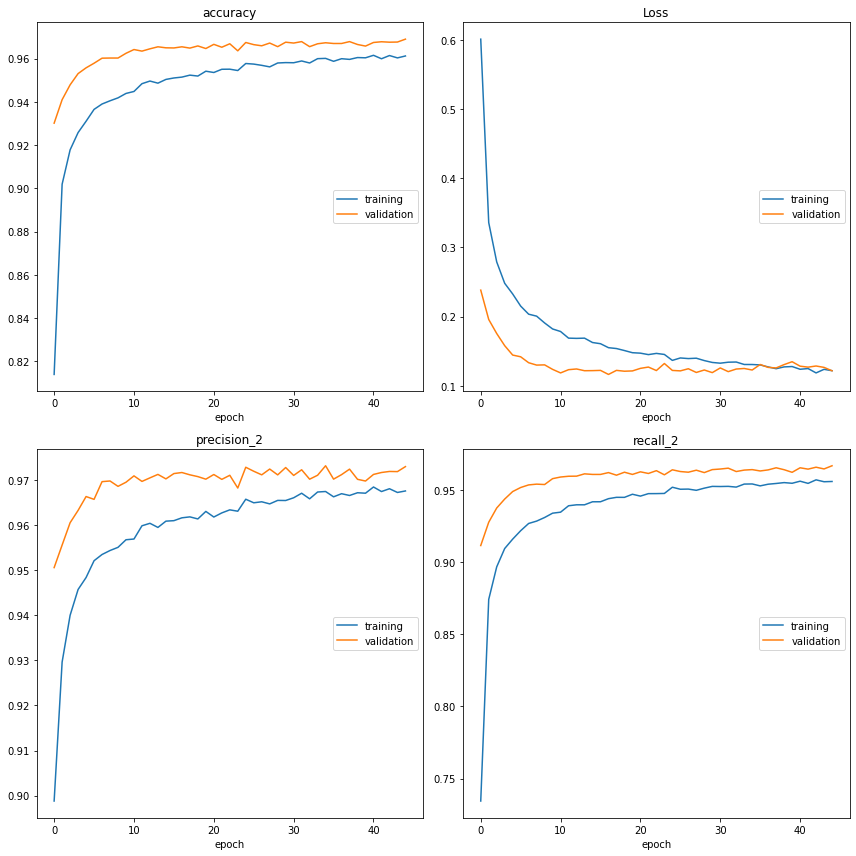

accuracy
	training         	 (min:    0.814, max:    0.962, cur:    0.961)
	validation       	 (min:    0.930, max:    0.969, cur:    0.969)
Loss
	training         	 (min:    0.118, max:    0.601, cur:    0.122)
	validation       	 (min:    0.116, max:    0.238, cur:    0.122)
precision_2
	training         	 (min:    0.899, max:    0.968, cur:    0.968)
	validation       	 (min:    0.951, max:    0.973, cur:    0.973)
recall_2
	training         	 (min:    0.734, max:    0.957, cur:    0.956)
	validation       	 (min:    0.911, max:    0.967, cur:    0.967)
1407/1407 [==============================] - 8s 6ms/step - loss: 0.1217 - accuracy: 0.9612 - precision_2: 0.9676 - recall_2: 0.9558 - val_loss: 0.1216 - val_accuracy: 0.9690 - val_precision_2: 0.9730 - val_recall_2: 0.9667
Epoch 46/50
1296/1407 [==========================>...] - ETA: 0s - loss: 0.1171 - accuracy: 0.9626 - precision_2: 0.9692 - recall_2: 0.9572

In [ ]:
model=Sequential()
model.add(Dense(50,activation="relu"))#h1
model.add(Dropout(0.3)) # dropout layer
model.add(Dense(50,activation="relu"))#h2
model.add(Dropout(0.3)) # dropout layer
model.add(Dense(10,activation="softmax"))#output
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy",Precision(),Recall()])

model.fit(x_train,y_train,epochs=50,callbacks=[PlotLossesKerasTF()],validation_data=(x_test,y_test))